In [21]:
FILE_PATH = '/Users/alexia/Documents/UniVie/Master Year 2/Praktikum/10_emg_data_1_3.csv'


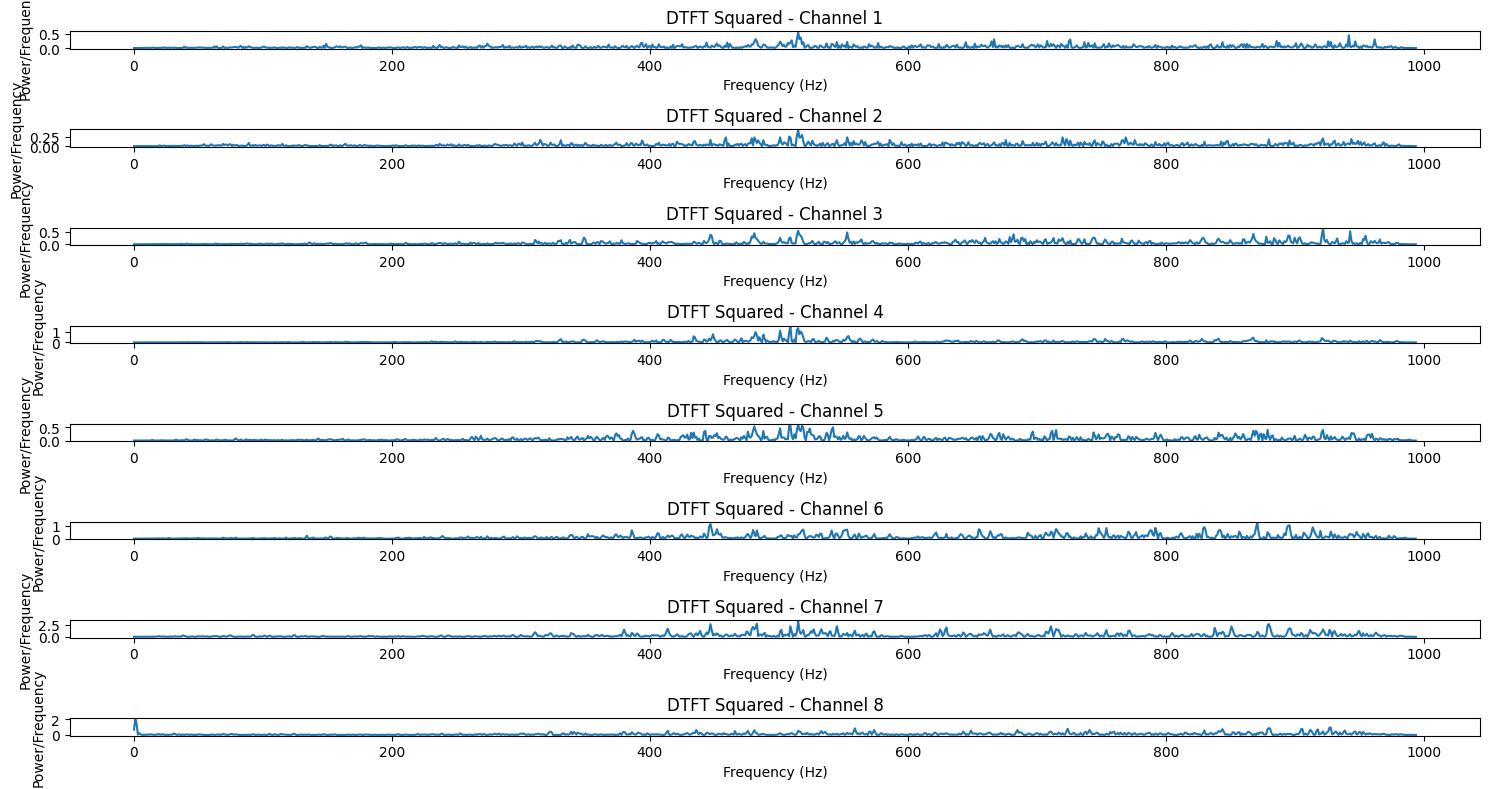

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch

def calculate_dtft_squared(signal, fs):
    _, Pxx = welch(signal, fs=fs, nperseg=len(signal))
    return Pxx

def plot_dtft_squared(emg_data, fs, figure_size=(12, 6)):
    num_channels = emg_data.shape[1]

    plt.figure(figsize=figure_size)
    
    for channel in range(num_channels):
        signal = emg_data.iloc[:, channel]
        dtft_squared = calculate_dtft_squared(signal, fs)

        plt.subplot(num_channels, 1, channel + 1)
        plt.plot(dtft_squared)
        plt.title(f'DTFT Squared - Channel {channel + 1}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power/Frequency')

    plt.tight_layout()
    plt.show()

file_path = '/Users/alexia/Documents/UniVie/Master Year 2/Praktikum/10_emg_data_1_5.csv'

emg_data = pd.read_csv(file_path)

fs = 1000 

custom_figure_size = (15, 8)

plot_dtft_squared(emg_data, fs, figure_size=custom_figure_size)


0.04
0.99


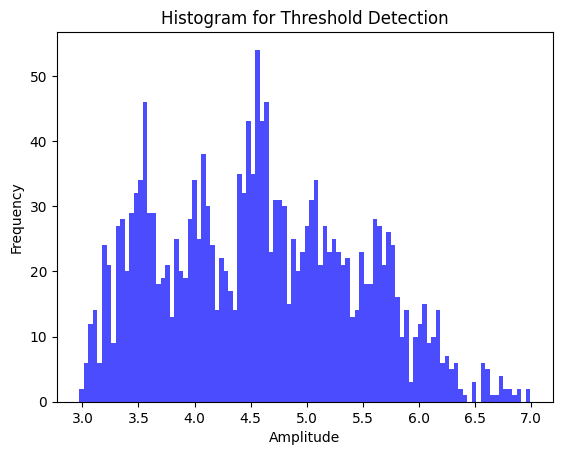

In [11]:
FILE_PATH = '/Users/alexia/Documents/UniVie/Master Year 2/Praktikum/10_emg_data_1_2.csv'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

def bandpass_filter(raw_data, fs, lowcut, highcut):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    low = max(0, min(low, 0.99))
    high = max(0, min(high, 0.99))


    b, a = signal.butter(4, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, raw_data)
    return filtered_data

def square_data(filtered_data):
    squared_data = np.square(filtered_data)
    return squared_data

def running_average(squared_data, window_size):
    if window_size >= len(squared_data):
        raise ValueError("Window size must be smaller than the length of the signal.")
    return np.convolve(squared_data, np.ones(window_size)/window_size, mode='valid')

def plot_histogram(data, bins=100, threshold=None):
    plt.hist(data, bins=bins, color='blue', alpha=0.7)
    if threshold is not None:
        plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')
        plt.legend()
    plt.title('Histogram for Threshold Detection')
    plt.xlabel('Amplitude')
    plt.ylabel('Frequency')
    plt.show()

file_path = FILE_PATH
emg_data = pd.read_csv(file_path, header=0)  

fs = 1000  
lowcut = 20  
highcut = 500  


window_size = 100

channel_to_process = 0

'''
plt.plot(emg_data.iloc[:, channel_to_process])
plt.title('Raw EMG Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
'''

filtered_data = bandpass_filter(emg_data.iloc[:, channel_to_process], fs, lowcut, highcut)

'''
plt.plot(filtered_data)
plt.title('Bandpass Filtered Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
'''

squared_data = square_data(filtered_data)
'''
# Plot squared data
plt.plot(squared_data)
plt.title('Squared Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
'''

smoothed_data = running_average(squared_data, window_size)
'''
plt.plot(smoothed_data)
plt.title('Running Average')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
'''


plot_histogram(smoothed_data, bins=100, threshold=None)  





